<a href="https://colab.research.google.com/github/SolbiChoi/TeamProject/blob/master/TeamProject_living_DL_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터 가져오기

In [1]:
import pandas as pd
total_data = pd.read_excel('./living_scraping.xlsx')
total_data.head(10)

,star grade,review
0,5.0,아주 잘 사용하고 있음\n입구가 넓어 세척도 편하고\n뚜껑도 딱 닫으면 세지 않아 ...
1,3.0,잘 사용하고 있었는데 타사이트에서 더 저렴하게 판매했다고하니 기분이 별로네요. 설명...
2,3.5,두개 펀딩했는데 하나는 작은 스크래치가 있더라구요.ㅜ 교환귀찮아서 그냥 씁니다. 검...
3,4.0,그냥 잘 사용하고 있어요
4,5.0,이뻐서 들고다니면서 보니까 좋으네요 용량도 크고 빨대도 있어서 더 좋아요
5,3.0,이 제품의 구입 목적은 가방에 넣어도 새지 않는 텀블러 구매였으므로 제품 자체에는 ...
6,1.0,펀딩가보다 네이버 런칭가를 더 싸게 팔고\n사은품까지 주다니요?\n그럼 펀딩한 사람...
7,4.0,칼라만 이뻐요 보온력은 별루네요
8,3.0,허허 텀블러 참 이쁘고 기능도 좋아요\n근데 텀블러 배송 받자마자 여기저기서 슬리브...
9,3.0,톡딜로 싸게 파신거 너무 속상해요 ㅠㅠ


In [2]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7522 entries, 0 to 7521
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   star grade  7522 non-null   float64
 1   review      7522 non-null   object 
dtypes: float64(1), object(1)
memory usage: 117.7+ KB


In [3]:
len(total_data)  # null 값 없음을 알수있다.

7522

# 2. 데이터 전처리

In [4]:
x_data = total_data['review']
y_data = total_data['star grade']

## y_data 전처리
: rate의 범위를 [1,2,3,4,5]로 만들기 위해 소수점 rate 처리

In [5]:
def make_y_data(val):
    if (1 <= val < 2):
        return 1
    elif (2 <= val < 3):
        return 2
    elif (3 <= val < 4):
        return 3
    elif (4 <= val < 5):
        return 4
    elif (5 <= val < 6):
        return 5
    else:
        return None

In [6]:
y_data = y_data.apply(lambda val:make_y_data(val))

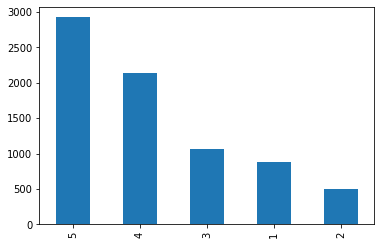

In [7]:
y_data.value_counts().plot(kind='bar')

In [8]:
y_data

0       5
1       3
2       3
3       4
4       5
       ..
7517    5
7518    5
7519    5
7520    3
7521    5
Name: star grade, Length: 7522, dtype: int64

## Split data

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5641,), (5641,), (1881,), (1881,))

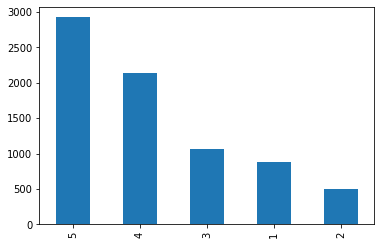

In [11]:
y_data.value_counts().plot(kind='bar')

## NPL (테스트 전처리)

In [12]:
!python -m pip install --upgrade pip

In [13]:
!python -m pip install konlpy 

  Using cached konlpy-0.5.2-py2.py3-none-any.whl (19.4 MB)
  Using cached colorama-0.4.4-py2.py3-none-any.whl (16 kB)
  Using cached beautifulsoup4-4.6.0-py3-none-any.whl (86 kB)
  Using cached JPype1-1.3.0-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (448 kB)
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [14]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0   105k      0 --:--:-- --:--:-- --:--:--  105k


In [15]:
!bash ./mecab.sh

Installing automake (A dependency for mecab-ko)
Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.l

In [16]:
x_train.str.replace('[^가-힣ㄱ-ㅎㅠ ]','')

1617    컬러도 예쁘고 받침대는 정말 생각 많이하고 만드셨다는 생각이 듭니다엄마도 보고 귀엽...
5803                                매일 양치할때 사용하는데 사용감 좋아요
1437        와디즈 펀딩한 거 중에 손에 꼽히게 좋은 물건이네요여기저기 두루두루 잘 쓰고있어요
6769    발 구석구석 잘 닦여서 좋아요 근데 벽에서 자꾸 떨어져서 고양이들이 너무 놀랍니당ㅋ...
6234    불량품이나 파손되어 올까봐 걱정했는데택배사가 늦게 보내준거 외엔 만족합니다바퀴는 끼...
                              ...                        
2024                    엉덩이 눌림으로 인한 부분은 아주 좋습니다 사무실에 꼭 사용
469     대체로 만족해요 쿨매트라고 하니 냉매제 넣어서 파는 것 처럼 눕자마자 시원해질것 같...
4649         손에 묻어서 일 넘게 가는중입니다변기에 뜨고  지켜봐야되겠지만 일단 반반입니다 
2560    고냥이 키우는 집은 필수입니다ㅋ늘 눈여겨보다 세트가 나와 드디어 샀어요사용할때마다 ...
6075    월 일 밤 시에 배송 받았구요일정이 있어 타 지역에 있다가 어제 집에 와서 오늘 풀...
Name: review, Length: 5641, dtype: object

In [17]:
# from konlpy.tag import Mecab

In [18]:
 from konlpy.tag import Okt

In [19]:
# mecab = Mecab()
mecab = Okt()

In [20]:
stopwords = ['의', '은', '는', '이', '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리'
, '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하', '때문', '그것', '두', '말하', '알', '그러나'
, '받', '못하', '일', '그런', '또', '문제', '더', '사회', '많', '그리고', '좋', '크', '따르', '중', '나오', '가지', '씨'
, '시키', '만들', '지금', '생각하', '그러', '속', '하나', '집', '살', '모르', '적', '월', '데', '자신', '안', '어떤', '내'
, '경우', '명', '생각', '시간', '그녀', '다시', '이런', '앞', '보이', '번', '나', '다른', '어떻', '여자', '개', '전', '들'
, '사실', '이렇', '점', '싶', '말', '정도', '좀', '원', '잘', '통하', '소리', '놓', '걍', '과', '를', '으로', '자', '에', '와', '한', '하다']

In [21]:
import pickle

In [22]:
pickle.dump(stopwords, open('./stopwords.pkl','wb'))

In [23]:
sentence = list()

for tok in x_train:
  encoded = mecab.morphs(tok)
  sentence.append([item for item in encoded if item not in stopwords])

sentence

[['컬러',
  '도',
  '예쁘고',
  '받침',
  '대',
  '정말',
  '많이하고',
  '만드셨다는',
  '듭니',
  '다',
  '~',
  '\n',
  '엄마',
  '도',
  '보고',
  '귀엽다고',
  '하셨어요',
  'ㅎㅎㅎㅎ',
  '\n',
  '방이',
  '별로',
  '넓어서',
  '앉아서',
  '쓱쓱',
  '밀면',
  '되니까',
  '좋네요',
  '^-^'],
 ['매일', '양치', '할', '사용', '하는데', '사', '용감', '좋아요', '~!'],
 ['와디',
  '즈',
  '펀딩',
  '거',
  '손',
  '꼽히게',
  '좋은',
  '물건',
  '이네',
  '요',
  '.',
  '\n',
  '여기저기',
  '두루',
  '두루',
  '쓰고있어요',
  '.'],
 ['발',
  '구석구석',
  '닦여서',
  '좋아요',
  '.',
  '근데',
  '벽',
  '에서',
  '자꾸',
  '떨어져서',
  '고양이',
  '너무',
  '놀랍니당',
  'ㅋㅋ',
  '허리',
  '아파서',
  '고개',
  '숙이기',
  '힘들',
  '정말',
  '편합니다',
  '.'],
 ['불량품',
  '이나',
  '파손',
  '되어',
  '올까봐',
  '걱정',
  '했는데',
  '\n',
  '택배',
  '사가',
  '늦게',
  '보내준거',
  '외',
  '엔',
  '만족합니다',
  '.',
  '\n',
  '바퀴',
  '끼기',
  '힘들었습니다',
  '.',
  '분들',
  '혼자',
  '서',
  '할수있나',
  '?',
  '싶을',
  '로',
  '요',
  '\n\n',
  '럼버',
  '서',
  '포트',
  '내려가는',
  '현상',
  '도',
  '아직',
  '없습니다',
  '.',
  '\n',
  '사용',
  '보면',
  '느슨해질',
  '거',
  '같은',
  '구조',
  '지만

## Tokenizer

In [24]:
import tensorflow as tf

In [25]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()

In [26]:
tokenizer.fit_on_texts(sentence)

In [27]:
tokenizer.word_index

{'.': 1,
 '\n': 2,
 '도': 3,
 '을': 4,
 '사용': 5,
 ',': 6,
 '제품': 7,
 '..': 8,
 '\n\n': 9,
 '너무': 10,
 '로': 11,
 '...': 12,
 '하고': 13,
 '부분': 14,
 '요': 15,
 '!': 16,
 '저': 17,
 '펀딩': 18,
 '다': 19,
 '입니다': 20,
 '느낌': 21,
 '에서': 22,
 '할': 23,
 '?': 24,
 '보다': 25,
 '만': 26,
 '같아요': 27,
 '~': 28,
 '했는데': 29,
 '베개': 30,
 '합니다': 31,
 '많이': 32,
 '정말': 33,
 '못': 34,
 '제': 35,
 '고': 36,
 '서': 37,
 '좋아요': 38,
 '거': 39,
 '해서': 40,
 '하는': 41,
 '그냥': 42,
 '조금': 43,
 '구매': 44,
 '처음': 45,
 '좋은': 46,
 '배송': 47,
 '게': 48,
 '써': 49,
 '있습니다': 50,
 '목': 51,
 '인': 52,
 '분': 53,
 '면': 54,
 '2': 55,
 '같습니다': 56,
 '보니': 57,
 '까지': 58,
 '해': 59,
 '쓰고': 60,
 '(': 61,
 '1': 62,
 '있는': 63,
 '즈': 64,
 '청소': 65,
 '에는': 66,
 '가격': 67,
 'ㅠㅠ': 68,
 ')': 69,
 '인데': 70,
 'ㅎㅎ': 71,
 '보고': 72,
 '의자': 73,
 '만족합니다': 74,
 '와디': 75,
 '이라': 76,
 '물': 77,
 '진짜': 78,
 '비': 79,
 '고정': 80,
 '!!': 81,
 '사이즈': 82,
 '대': 83,
 '조절': 84,
 '일단': 85,
 '하면': 86,
 '설명': 87,
 '좋습니다': 88,
 '효과': 89,
 '걸': 90,
 '아주': 91,
 '후': 92,
 '바닥': 93,
 '좋

In [28]:
tokenizer.word_counts

OrderedDict([('컬러', 38),
             ('도', 3422),
             ('예쁘고', 38),
             ('받침', 80),
             ('대', 330),
             ('정말', 689),
             ('많이하고', 5),
             ('만드셨다는', 1),
             ('듭니', 128),
             ('다', 979),
             ('~', 744),
             ('\n', 9044),
             ('엄마', 91),
             ('보고', 364),
             ('귀엽다고', 1),
             ('하셨어요', 13),
             ('ㅎㅎㅎㅎ', 15),
             ('방이', 3),
             ('별로', 184),
             ('넓어서', 13),
             ('앉아서', 37),
             ('쓱쓱', 17),
             ('밀면', 6),
             ('되니까', 19),
             ('좋네요', 297),
             ('^-^', 2),
             ('매일', 85),
             ('양치', 20),
             ('할', 838),
             ('사용', 2512),
             ('하는데', 206),
             ('사', 183),
             ('용감', 40),
             ('좋아요', 632),
             ('~!', 52),
             ('와디', 361),
             ('즈', 386),
             ('펀딩', 994),
             ('거', 629)

In [29]:
total_cnt = len(tokenizer.word_index)

rare_cnt = 0
total_freq, rare_freq = 0, 0

for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value  # 전체 단어 수
  if (value <= 2):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value  # 2 미만의 수

In [30]:
total_cnt, rare_cnt, rare_cnt/total_cnt, rare_freq/total_freq

(27798, 19488, 0.701057630045327, 0.08956236701362931)

In [31]:
vocab_size = total_cnt - rare_cnt

In [32]:
vocab_size

8310

In [33]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(vocab_size, oov_token='OOV')

In [34]:
tokenizer.fit_on_texts(sentence)

In [35]:
tokenizer.index_word

{1: 'OOV',
 2: '.',
 3: '\n',
 4: '도',
 5: '을',
 6: '사용',
 7: ',',
 8: '제품',
 9: '..',
 10: '\n\n',
 11: '너무',
 12: '로',
 13: '...',
 14: '하고',
 15: '부분',
 16: '요',
 17: '!',
 18: '저',
 19: '펀딩',
 20: '다',
 21: '입니다',
 22: '느낌',
 23: '에서',
 24: '할',
 25: '?',
 26: '보다',
 27: '만',
 28: '같아요',
 29: '~',
 30: '했는데',
 31: '베개',
 32: '합니다',
 33: '많이',
 34: '정말',
 35: '못',
 36: '제',
 37: '고',
 38: '서',
 39: '좋아요',
 40: '거',
 41: '해서',
 42: '하는',
 43: '그냥',
 44: '조금',
 45: '구매',
 46: '처음',
 47: '좋은',
 48: '배송',
 49: '게',
 50: '써',
 51: '있습니다',
 52: '목',
 53: '인',
 54: '분',
 55: '면',
 56: '2',
 57: '같습니다',
 58: '보니',
 59: '까지',
 60: '해',
 61: '쓰고',
 62: '(',
 63: '1',
 64: '있는',
 65: '즈',
 66: '청소',
 67: '에는',
 68: '가격',
 69: 'ㅠㅠ',
 70: ')',
 71: '인데',
 72: 'ㅎㅎ',
 73: '보고',
 74: '의자',
 75: '만족합니다',
 76: '와디',
 77: '이라',
 78: '물',
 79: '진짜',
 80: '비',
 81: '고정',
 82: '!!',
 83: '사이즈',
 84: '대',
 85: '조절',
 86: '일단',
 87: '하면',
 88: '설명',
 89: '좋습니다',
 90: '효과',
 91: '걸',
 92: '아주',
 93: '후',
 9

In [36]:
pickle.dump(tokenizer, open('./tokenizer_living.pkl','wb'))

## x_train 숫자화

In [37]:
x_train = tokenizer.texts_to_sequences(sentence)

In [38]:
print(x_train[0:3])

[[982, 4, 983, 503, 84, 34, 4738, 1, 300, 20, 29, 3, 442, 4, 73, 1, 2431, 2190, 3, 6536, 185, 2432, 1010, 1974, 4174, 1795, 95, 1], [471, 1726, 24, 6, 157, 189, 935, 39, 751], [76, 65, 19, 40, 127, 1, 47, 196, 255, 16, 2, 3, 1309, 5463, 5463, 1397, 2]]


In [39]:
hist_len = [len(words) for words in x_train]

(array([1.870e+03, 1.144e+03, 7.160e+02, 4.880e+02, 3.170e+02, 2.360e+02,
        1.950e+02, 1.050e+02, 9.200e+01, 7.700e+01, 7.200e+01, 5.000e+01,
        3.700e+01, 4.100e+01, 3.700e+01, 2.500e+01, 1.600e+01, 1.400e+01,
        1.200e+01, 1.300e+01, 8.000e+00, 5.000e+00, 1.100e+01, 2.000e+00,
        7.000e+00, 5.000e+00, 5.000e+00, 6.000e+00, 3.000e+00, 1.000e+00,
        3.000e+00, 4.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 2.000e+00,
        1.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00]),
 array([  2. ,  15.1,  28.2,  41.3,  54.4,  67.5,  80.6,  93.7, 106.8,
        119.9, 133. , 146.1, 159.2, 172.3, 185.4, 198.5, 211.6, 224.7,
        237.8, 250.9, 264. , 277.1, 290.2, 303.3, 316.4, 329.5, 342.6,
        355.7, 368.8, 381.9, 395. , 408.1, 421.2, 434.3, 447.4, 460.5,
        473.6, 486.7, 499.8, 512.9, 526. , 539.1, 552.2, 565.3, 578.4,
        591.5, 604.6,

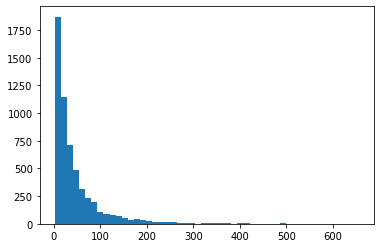

In [40]:
import matplotlib.pyplot as plt
plt.hist(hist_len, bins=50)

### padding

In [41]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=200)

In [42]:
x_train

array([[   0,    0,    0, ..., 1795,   95,    1],
       [   0,    0,    0, ...,  935,   39,  751],
       [   0,    0,    0, ..., 5463, 1397,    2],
       ...,
       [   0,    0,    0, ...,  291,   20,   17],
       [   0,    0,    0, ...,  312, 1046,    2],
       [   1,    7,   42, ...,    7,    1,    2]], dtype=int32)

In [43]:
import numpy as np
y_train = np.array(y_train)-1
np.unique(y_train)

array([0, 1, 2, 3, 4])

In [44]:
len(x_train),len(y_train)

(5641, 5641)

# 3. Make model

In [45]:
model = tf.keras.models.Sequential()

In [46]:
model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=30, input_length=200))  # input layer

# model.add(tf.keras.layers.LSTM(128))  # hidden layer
 #model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)))  # hidden layer
 #model.add(tf.keras.layers.GRU(32, return_sequences=True))  # hidden layer
model.add(tf.keras.layers.GRU(128, return_sequences=True))  # hidden layer
model.add(tf.keras.layers.GRU(64))  # hidden layer

model.add(tf.keras.layers.Dense(5, activation='softmax'))  # output layer

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])  # gadget

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 30)           249300    
_________________________________________________________________
gru (GRU)                    (None, 200, 128)          61440     
_________________________________________________________________
gru_1 (GRU)                  (None, 64)                37248     
_________________________________________________________________
dense (Dense)                (None, 5)                 325       
Total params: 348,313
Trainable params: 348,313
Non-trainable params: 0
_________________________________________________________________


In [48]:
hist = model.fit(x_train, y_train, epochs=300, batch_size=256, validation_split=0.3, shuffle=True)

Epoch 1/300
16/16 [==============================] - 38s 2s/step - loss: 1.5122 - acc: 0.3716 - val_loss: 1.4149 - val_acc: 0.3981
Epoch 2/300
16/16 [==============================] - 28s 2s/step - loss: 1.3922 - acc: 0.3883 - val_loss: 1.3518 - val_acc: 0.3981
Epoch 3/300
16/16 [==============================] - 29s 2s/step - loss: 1.2399 - acc: 0.4478 - val_loss: 1.2192 - val_acc: 0.4743
Epoch 4/300
16/16 [==============================] - 28s 2s/step - loss: 1.0192 - acc: 0.5570 - val_loss: 1.2515 - val_acc: 0.4938
Epoch 5/300
16/16 [==============================] - 27s 2s/step - loss: 0.8634 - acc: 0.6322 - val_loss: 1.2649 - val_acc: 0.4867
Epoch 6/300
16/16 [==============================] - 28s 2s/step - loss: 0.7214 - acc: 0.7105 - val_loss: 1.4170 - val_acc: 0.4802
Epoch 7/300
16/16 [==============================] - 28s 2s/step - loss: 0.5978 - acc: 0.7682 - val_loss: 1.6117 - val_acc: 0.4914
Epoch 8/300
16/16 [==============================] - 28s 2s/step - loss: 0.5140 - a

# 4. Evaluation

In [49]:
# model.evaluate(x_train, y_train)  # Bidirection epochs 100 : - loss: 1.3254 - acc: 0.8286 -> (60s)

In [50]:
# model.evaluate(x_train, y_train)  # GRU(128) epochs 100 : - loss: 1.6015 - acc: 0.8201 -> 대신 훨씬 빠름 (32s)

In [51]:
# model.evaluate(x_train, y_train)  # GRU(128) epochs 500 : - loss: 1.9807 - acc: 0.8355 -> (18s)

In [52]:
# model.evaluate(x_train, y_train)  # GRU(128,64) epochs 500 : - loss: 1.7509 - acc: 0.8343 -> (46s)

In [53]:
model.evaluate(x_train, y_train)

177/177 [==============================] - 13s 71ms/step - loss: 1.3894 - acc: 0.8429


[1.3893746137619019, 0.8429356217384338]

# 5. Service

In [54]:
model.save('./DL_living.h5')

# 그래프로 값 비교

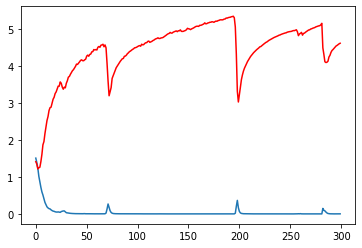

In [55]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'],'-r')
plt.show()

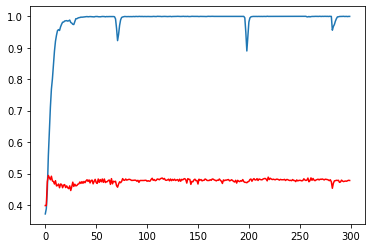

In [56]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'],'-r')
plt.show()